In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import mstats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mapping_file = pd.read_csv('../QIIME2.2/mapping_file/mapping_file.csv', index_col=0)
print(mapping_file.shape)
mapping_file

(143, 42)


,genotype_1,fertility_1,amf,rep_1,group_1,shoot_mass,root_mass,total_mass,ratio_root_to_shoot,root_colonization,...,G_5,FERT_5,AMF,REP_5,group_5,Length,AvgDiam,Forks,SurfArea,Origin
#SampleID,,,,,,,,,,,,,,,,,,,,,
L1,1,P,Y,1,Common (C. dactylon),29.961,4.46,34.421,0.129572,43,...,1,P,Y,1,Common (C. dactylon),162.8464,0.2905,904.0,14.8643,African
L10,1,PPP,Y,2,Common (C. dactylon),26.283,10.16,36.443,0.278792,36,...,1,PPP,Y,2,Common (C. dactylon),329.7942,0.2978,2620.0,30.8595,African
L100,9,PP,Y,5,Common (C. dactylon),18.142,6.82,24.962,0.273215,21,...,9,PP,Y,5,Common (C. dactylon),229.4975,0.3495,1577.0,25.1969,Asian
L101,9,PP,Y,1,Common (C. dactylon),25.649,10.88,36.529,0.297846,26,...,9,PP,Y,1,Common (C. dactylon),216.1839,0.3708,1395.0,25.1835,Asian
L102,9,PP,Y,2,Common (C. dactylon),25.664,12.66,38.324,0.330341,39,...,9,PP,Y,2,Common (C. dactylon),302.0509,0.2743,1827.0,26.0297,Asian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L95,8,PPP,Y,4,Hybrid (C. transvaalensis),22.510,8.57,31.080,0.275740,40,...,8,PPP,Y,4,Hybrid (C. transvaalensis),106.4580,0.3194,150.0,10.6812,African
L96,9,P,Y,5,Common (C. dactylon),18.365,8.69,27.055,0.321198,31,...,9,P,Y,5,Common (C. dactylon),357.6942,0.2741,2434.0,30.8066,Asian
L97,9,P,Y,1,Common (C. dactylon),20.526,5.16,25.686,0.200888,36,...,9,P,Y,1,Common (C. dactylon),213.3945,0.3306,1244.0,22.1649,Asian


In [3]:
# mapping_file.describe().to_csv('../Data/summary_info_describe_mapping_file.csv')

In [4]:
mapping_file.columns.values

array(['genotype_1', 'fertility_1', 'amf', 'rep_1', 'group_1',
       'shoot_mass', 'root_mass', 'total_mass', 'ratio_root_to_shoot',
       'root_colonization', 'genotype_2`', 'fertility_2', 'rep_2',
       'total_biomass_esponse', 'root_biomass_response',
       'shoot_biomass_response', 'genotype_4', 'fertility_4', 'inoculum',
       'rep_4', 'TN', 'P', 'Ca', 'K', 'Mg', 'Na', 'S', 'B', 'Fe', 'Zn',
       'Cu', 'Mn', 'G_5', 'FERT_5', 'AMF', 'REP_5', 'group_5', 'Length',
       'AvgDiam', 'Forks', 'SurfArea', 'Origin'], dtype=object)

In [5]:
model = ols('root_colonization' + ' ~ C(genotype_1) + C(fertility_1) + C(genotype_1):C(fertility_1)', data=mapping_file).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(genotype_1),1154.743927,11.0,1.702175,0.082428
C(fertility_1),14.092614,2.0,0.114254,0.892140
C(genotype_1):C(fertility_1),1040.793750,22.0,0.767102,0.758253
Residual,6598.916667,107.0,NaN,NaN


In [6]:
anova_table.columns

Index(['sum_sq', 'df', 'F', 'PR(>F)'], dtype='object')

In [7]:
anova_table['F']

C(genotype_1)                   1.702175
C(fertility_1)                  0.114254
C(genotype_1):C(fertility_1)    0.767102
Residual                             NaN
Name: F, dtype: float64

In [12]:
mapping_file[['Origin']].value_counts()

Origin 
African    84
Asian      59
dtype: int64

In [16]:
H, pval = mstats.kruskalwallis(mapping_file[mapping_file['Origin'] == 'Asian']['shoot_mass'].values, mapping_file[mapping_file['Origin'] == 'African']['shoot_mass'].values)

In [20]:
p_values_1 = []
p_values_2 = []
p_values_3 = []
p_values_4 = []
f_stats_1 = []
f_stats_2 = []
f_stats_3 = []
f_stats_4 = []
columns = ['shoot_mass', 'root_mass', 'total_mass', 'ratio_root_to_shoot',
       'root_colonization', 'total_biomass_esponse', 'root_biomass_response','shoot_biomass_response', 'TN',
       'P', 'Ca', 'K', 'Mg', 'Na', 'S', 'Fe', 'Zn', 'Cu', 'Mn', 'Length',
       'AvgDiam', 'Forks', 'SurfArea']
for col in columns:
#     print(col)
    model = ols(col + ' ~ C(genotype_1) + C(fertility_1) + C(genotype_1):C(fertility_1)', data=mapping_file).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    f_stats_1.append(anova_table['F'][0])
    f_stats_2.append(anova_table['F'][1])
    f_stats_3.append(anova_table['F'][2])
    p_values_1.append(anova_table['PR(>F)'][0])
    p_values_2.append(anova_table['PR(>F)'][1])
    p_values_3.append(anova_table['PR(>F)'][2])
    
    H, pval = mstats.kruskalwallis(mapping_file[mapping_file['Origin'] == 'Asian'][col].values, 
                                   mapping_file[mapping_file['Origin'] == 'African'][col].values)
    f_stats_4.append(H)
    p_values_4.append(pval)
anova_df = pd.DataFrame({'Measurement': columns,'F stat (G)':f_stats_1,'P value (G)':p_values_1,
                         'F stat (F)':f_stats_2,'P value (F)':p_values_2,
                         'F stat (GxF)':f_stats_3,'P value (GxF)':p_values_3,
                        'H stat (Origin)':f_stats_4,'P value (Origin)':p_values_4})
anova_df = anova_df.replace({'shoot_mass': 'Shoot mass','root_mass':'Root mass', 'total_mass':'Total mass',
                 'ratio_root_to_shoot':'Root/shoot ratio','root_colonization':'Root colonization',
                  'inoculum':'Inoculum', 'AvgDiam':'Diameter (avg)', 'SurfArea':'Surface area',
                    'total_biomass_esponse':'Total biomass response', 'root_biomass_response':'Root biomass response',
                             'shoot_biomass_response':'Shoot biomass response'})
for col in ['F stat (G)','F stat (F)','F stat (GxF)','H stat (Origin)']:
    anova_df[col] = [round(x, 1) for x in anova_df[col]]
for col in ['P value (G)', 'P value (F)','P value (GxF)','P value (Origin)']:
    anova_df[col] = anova_df[col].astype('float')
    anova_df[col] = [str(round(x, 3)) if x > 0.001 else '< 0.001' for x in anova_df[col]]
anova_df.head()

,Measurement,F stat (G),P value (G),F stat (F),P value (F),F stat (GxF),P value (GxF),H stat (Origin),P value (Origin)
0,Shoot mass,10.9,< 0.001,15.2,< 0.001,1.9,0.015,14.7,< 0.001
1,Root mass,6.8,< 0.001,0.1,0.932,1.3,0.213,8.6,0.003
2,Total mass,11.1,< 0.001,3.6,0.031,1.4,0.126,17.2,< 0.001
3,Root/shoot ratio,4.0,< 0.001,3.5,0.034,1.4,0.131,0.9,0.339
4,Root colonization,1.7,0.082,0.1,0.892,0.8,0.758,2.1,0.149


In [10]:
# ANOVA

p_values_1 = []
p_values_2 = []
p_values_3 = []
p_values_4 = []
f_stats_1 = []
f_stats_2 = []
f_stats_3 = []
f_stats_4 = []
columns = ['shoot_mass', 'root_mass', 'total_mass', 'ratio_root_to_shoot',
       'root_colonization', 'total_biomass_esponse', 'root_biomass_response','shoot_biomass_response', 'TN',
       'P', 'Ca', 'K', 'Mg', 'Na', 'S', 'Fe', 'Zn', 'Cu', 'Mn', 'Length',
       'AvgDiam', 'Forks', 'SurfArea']
for col in columns:
#     print(col)
    model = ols(col + ' ~ C(genotype_1) + C(fertility_1) + C(genotype_1):C(fertility_1)', data=mapping_file).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    f_stats_1.append(anova_table['F'][0])
    f_stats_2.append(anova_table['F'][1])
    f_stats_3.append(anova_table['F'][2])
    p_values_1.append(anova_table['PR(>F)'][0])
    p_values_2.append(anova_table['PR(>F)'][1])
    p_values_3.append(anova_table['PR(>F)'][2])
    
    model = ols(col + ' ~ C(Origin)', data=mapping_file).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    f_stats_4.append(anova_table['F'][0])
    p_values_4.append(anova_table['PR(>F)'][0])
anova_df = pd.DataFrame({'Measurement': columns,'F stat (G)':f_stats_1,'P value (G)':p_values_1,
                         'F stat (F)':f_stats_2,'P value (F)':p_values_2,
                         'F stat (GxF)':f_stats_3,'P value (GxF)':p_values_3,
                        'F stat (Origin)':f_stats_4,'P value (Origin)':p_values_4})
anova_df = anova_df.replace({'shoot_mass': 'Shoot mass','root_mass':'Root mass', 'total_mass':'Total mass',
                 'ratio_root_to_shoot':'Root/shoot ratio','root_colonization':'Root colonization',
                  'inoculum':'Inoculum', 'AvgDiam':'Diameter (avg)', 'SurfArea':'Surface area',
                    'total_biomass_esponse':'Total biomass response', 'root_biomass_response':'Root biomass response',
                             'shoot_biomass_response':'Shoot biomass response'})
for col in ['F stat (G)','F stat (F)','F stat (GxF)','F stat (Origin)']:
    anova_df[col] = [round(x, 1) for x in anova_df[col]]
for col in ['P value (G)', 'P value (F)','P value (GxF)','P value (Origin)']:
    anova_df[col] = anova_df[col].astype('float')
    anova_df[col] = [str(round(x, 3)) if x > 0.001 else '< 0.001' for x in anova_df[col]]
anova_df.head()

,Measurement,F stat (G),P value (G),F stat (F),P value (F),F stat (GxF),P value (GxF),F stat (Origin),P value (Origin)
0,Shoot mass,10.9,< 0.001,15.2,< 0.001,1.9,0.015,14.8,< 0.001
1,Root mass,6.8,< 0.001,0.1,0.932,1.3,0.213,10.3,0.002
2,Total mass,11.1,< 0.001,3.6,0.031,1.4,0.126,18.3,< 0.001
3,Root/shoot ratio,4.0,< 0.001,3.5,0.034,1.4,0.131,1.1,0.3
4,Root colonization,1.7,0.082,0.1,0.892,0.8,0.758,2.6,0.109


In [21]:
anova_df.to_csv('../Data/genotypexfertility_anova_table_origin_KW.csv', index=False)

<AxesSubplot:xlabel='Origin', ylabel='shoot_biomass_response'>

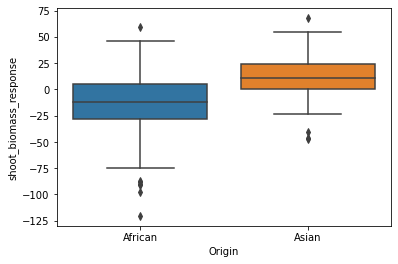

In [12]:
sns.boxplot(y = 'shoot_biomass_response', x = 'Origin', data = mapping_file)

(0.0, 60.0)

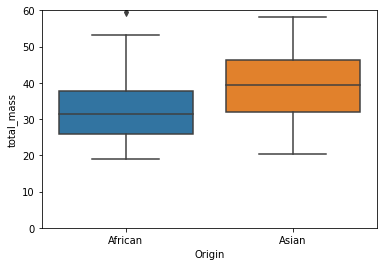

In [15]:
sns.boxplot(y = 'total_mass', x = 'Origin', data = mapping_file)
plt.ylim(0,60)

<AxesSubplot:xlabel='genotype_1', ylabel='shoot_biomass_response'>

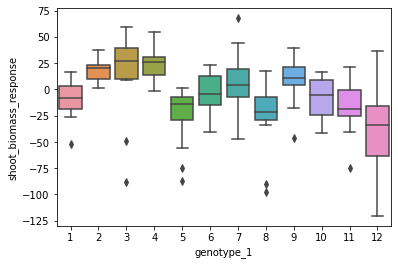

In [10]:
sns.boxplot(y = 'shoot_biomass_response', x = 'genotype_1', data = mapping_file)
# plt.ylim([0,2])

<AxesSubplot:xlabel='fertility_1', ylabel='total_biomass_esponse'>

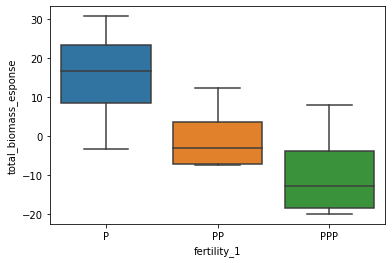

In [20]:
sns.boxplot(y = 'total_biomass_esponse', x = 'fertility_1', data = mapping_file[mapping_file['genotype_1'] == 4],
           order = ['P','PP','PPP'])
# plt.ylim([0,35])

<AxesSubplot:xlabel='genotype_1', ylabel='Na'>

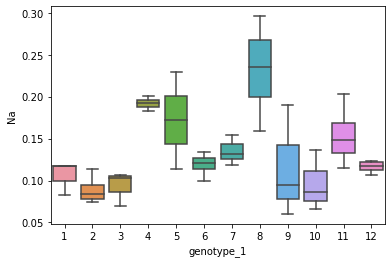

In [27]:
sns.boxplot(y = 'Na', x = 'genotype_1', data = mapping_file[mapping_file['fertility_1'] == 'P'])
# plt.ylim([0,35])

<AxesSubplot:xlabel='genotype_1', ylabel='shoot_biomass_response'>

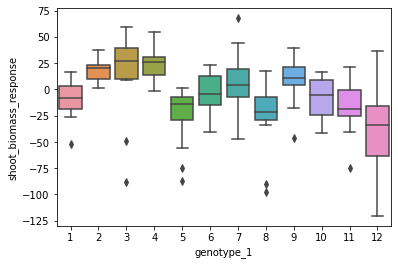

In [15]:
sns.boxplot(y = 'shoot_biomass_response', x = 'genotype_1', data = mapping_file)
# plt.ylim([0,35])